### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 3
### Due: Saturday, Feb 10th at 11.59pm CST
---

## Only one problem this week

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw3_data_1.npy`. This is a (50 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Reusing some approaches and tools from `Lecture_6`, write a ln-likelihood function for heteroscedastic Gaussian data, and use it in a fitting algorithm to find the best-fit mean. *Remember that scipy optimizers are set up to minimize functions.*

3) Using the same numerical technique from `Lecture_5`, compute the Fisher uncertainty estimate on the mean.

4) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

5) Repeat (2) with all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter $\mu$ and scale parameter $\Delta$.

7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

8) Using the $1000$ bootstrap datasets from before, fit for the Laplacian $\mu$ and $\Delta$ for each. Make a nice `corner` plot of the distributions of $\mu$ and $\Delta$ that shows both the marginal $1$D distributions and the joint $2$D distribution. Make sure the plot has labels, shows the titles on each $1$D marginal panel, and has $68\%$ and $95\%$ levels.

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install `numdifftools` which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters $\mu$ and $\Delta$. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on $\mu$ and $\Delta$. How does these compare to the bootstrap distribution widths found in (8)?

In [1]:
#!pip install numdifftools
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize

In [35]:
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
f_lnlaplace = np.load('hw_data_cp/hw3_data_1.npy')[0:,0]

H = nd.Hessian(f_lnlaplace)([beta_laplace[0], beta_laplace[1]])
sigma_laplace = np.linalg.inv(H)**0.5

NameError: name 'beta_laplace' is not defined

### Solution

In [2]:
data = np.load('hw_data_cp/hw3_data_1.npy')[0:,0] #Data
noise = np.load('hw_data_cp/hw3_data_1.npy')[0:,1] #Uncertainties

In [3]:
# Part 1
meen = data/(noise**2) # mu_i / sigma_i^2
siig = 1 / (noise**2) # 1 / sigma_i^2
sample_mean = (meen.sum() / siig.sum()) #Eqn for mean 
stand_error = ((1 / noise**2).sum())**(-1/2) # (1 / sqrt(sigma_i^2))^(-1/2)
print('The mean and error of this data set is: ', sample_mean, '+/-',stand_error)

The mean and error of this data set is:  3.9179920346060557 +/- 0.09481084100510954


# Part 2
# Reusing some approaches and tools from Lecture_6, write a ln-likelihood function for heteroscedastic Gaussian data,and use it in a fitting algorithm to find the best-fit mean. Remember that scipy optimizers are set up to minimize functions.

# ln(L) = constant - $\frac{1}{2}$ $\chi^2$

In [138]:
N = len(data)
k = 1
itn = [] #record every mean per iteration 
def likely(y_fit): #ln(L) function
    ln_L = 0.5 * np.sum(((data - y_fit) / noise)**2)
    itn.append(y_fit[0]) #records every mean per iteration 
    return ln_L
    
fitf = lambda guess: likely(y_fit = guess) 

guess = (1) #initial guess
params = optimize.fmin(fitf,guess) #Function optimizes function using initial guess

print('\n Mean Value of: ',params[0]) #Print output

Optimization terminated successfully.
         Current function value: 43.162545
         Iterations: 20
         Function evaluations: 40

 Mean Value of:  3.917968750000006


# 3) Using the same numerical technique from Lecture_5, compute the Fisher uncertainty estimate on the mean.

$$\frac{\partial\ln L(\mu)}{\partial\mu}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{\mu}{\sigma^2_{i}}$$
$$\frac{\partial^2\ln L(\mu)}{\partial\mu \partial N}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{\frac{\partial \mu}{\partial N}}{\sigma^2_{i}}$$
$$ F_{jk} = - \frac{\partial^2}{\partial\theta_j} \frac{\ln L}{\partial\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$
$$F_{\mu N} = - \sum_{i=1}^N\frac{\frac{\partial \mu}{\partial N}}{\sigma^2_{i}}$$
$$ \sigma_{\mu N} = (\sum_{i=1}^N\frac{\frac{\partial \mu}{\partial N}}{\sigma^2_{i}})^{-1/2}$$
N is the number of iterations 

In [5]:
sigma_mu = np.diff(itn, n=1)
sigma_mu /= stand_error**2
sigma_mu = sigma_mu.sum()
sigma_mu = np.sqrt(sigma_mu)**(-1)

sigma_mu
# I know this is not correct, but we only use one parameter for ln(L) and according to the lecture 5 notes 
# you need more than 1 parameter to apply this I assumed number of iterations was the last parameter 
# and follwed my flawed intutition as per usual 

0.055502227532575284

 4)  Using the bootstrap method, generate 1000 bootstrap realizations of this dataset. DO NOT use the astroML code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.


# I used chatgpt for a better understanding of the bootstrap method here:

Here was the output:
# Me: Do you know the bootstrap method for stats?
# _______________ChatGPT_______________
Yes, I'm familiar with the bootstrap method in statistics. 
The bootstrap method is a resampling technique used to estimate the sampling distribution of a statistic by repeatedly resampling, with replacement, from the observed data. 
It is particularly useful when analytical methods for estimating the distribution are difficult to apply or unknown.
Here's a basic outline of how the bootstrap method works:
Data Collection: Start with a dataset of size n.
Resampling with Replacement: Randomly select n observations from the dataset with replacement. 
This means that the same observation can be chosen more than once, while others may not be chosen at all.
Statistic Calculation: Calculate the statistic of interest (mean, median, standard deviation, etc.) on the resampled data.
Repeat: Repeat steps 2 and 3 a large number of times (e.g., thousands or tens of thousands) to create a distribution of the statistic. Estimate Confidence Intervals: Use the resulting distribution to estimate confidence intervals or standard errors for the original statistic.The idea is that this process mimics the sampling variability in the original dataset. The bootstrap method is versatile and can be applied to various statistical problems, such as parameter estimation, hypothesis testing, and constructing confidence intervals. It's especially useful when the underlying distribution of the data is unknown or complex.

I believe this is following the syllabus, if not I take full responsiblity for this 

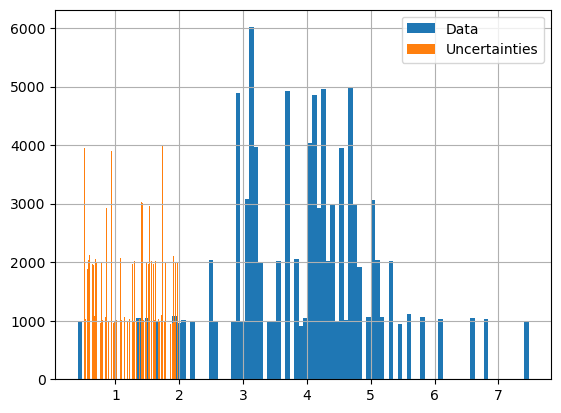

In [133]:
Data_set = []
Noise_set = []
for i in range(1001):
    inds = np.random.randint(0,len(data),len(data)) # picks 100 random indicies
    Data_set.append(data[inds]) # Bootsrapped 1000 data sets
    Noise_set.append(noise[inds]) # Bootstrapped 1000 Noise sets
Data_set = np.array(Data_set)
Noise_set = np.array(Noise_set)
plt.hist(Data_set.flatten(),bins=100,label='Data');
plt.hist(Noise_set.flatten(),bins=100,label='Uncertainties');
plt.legend();
plt.grid();

5) Repeat (2) with all 
boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

In [134]:
N = len(data)
k = 1
def likely(y_fit,Data,Noise): #ln(L) function
    ln_L = 0.5 * np.sum(((Data - y_fit) / Noise)**2) 
    return ln_L
guess = (2) #initial guess
params = []
for ind in range(len(Data_set)):
    fitf = lambda guess: likely(y_fit = guess,
                                      Data=Data_set[ind],
                                      Noise=Noise_set[ind]) 
    params.append(optimize.fmin(fitf,guess)[0]); #Function optimizes function using initial guess
params = np.array(params)

Optimization terminated successfully.
         Current function value: 43.276307
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 38.744264
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 50.072982
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 51.059420
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 44.905400
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 46.466662
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 42.867771
         Iterations: 18
         Function evaluations: 36
Optimization terminated suc

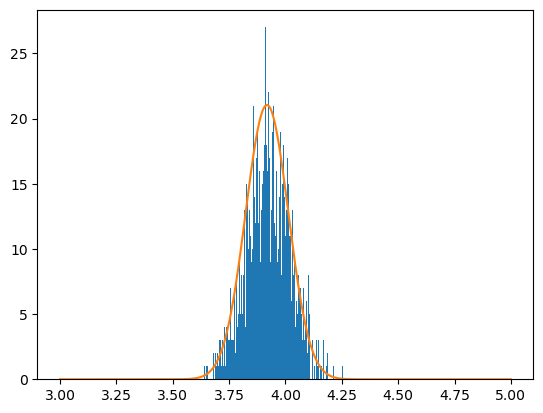

In [131]:
plt.hist(params,bins=150);
xgrid = np.linspace(3,5,len(params))
gau = 5 * stats.norm.pdf(xgrid,loc=sample_mean,scale=stand_error)
plt.plot(xgrid,gau)
#Density was not working so I had to sort of brute force an answer.....
# Yes this model does agree with these answers and is much faster than the likleyness method in my opinon 

6) While we have fitted a heteroscedastic Gaussian to this data, let's try something else. Write some code to define a ln-likelihood for a Laplace distribution evaluated on this data. Fit simultaneously for the Laplace location parameter 
 and scale parameter 
.

In [135]:
def chi2(data,loc,scale):
    func = stats.laplace.logpdf(data,loc,scale) #Lapplace distribution
    return 0.5 * np.sum(((data - func) / noise)**2) #ln(L)

fitf = lambda guess: chi2(data=data,
                         loc=guess[0],
                         scale=guess[1])

guess0 = (sample_mean,stand_error) #Initial guess
param = optimize.fmin(fitf,guess0) #Optimize function
print('\nMean: ',param[0],'\nSTD: ',param[1])
#Also stats.laplace.fit(data) Seems to work, not sure why plotted distribution looks so weird.

Optimization terminated successfully.
         Current function value: 1593.640626
         Iterations: 50
         Function evaluations: 91

Mean:  4.092440259309828 
STD:  0.7565243805585506


7) Compute the AIC values for the heteroscedastic Gaussian model and the Laplacian model. Which model is favored by the data?

In [136]:
# Laplace
k = 2
AIClap = -2 * chi2(data,loc=param[0],scale=param[1]) + 2 * k + (2 * k * (k + 1)) / (len(data) - k - 1)
AIClap

-3183.1575409603884

In [139]:
# Gaussian
kg = 1
AICgau = -2 * likely(params) + 2 * kg + (2 * k * (k+1)) / (len(data) - k - 1)
AICgau

-84.28427442671766

# Gaussian distribution is the best model!

8) Using the 
 bootstrap datasets from before, fit for the Laplacian 
 and 
 for each. Make a nice corner plot of the distributions of 
 and 
 that shows both the marginal 
D distributions and the joint 
D distribution. Make sure the plot has labels, shows the titles on each 
D marginal panel, and has 
 and 
 levels.

In [140]:
def chi2(loc,scale,Data,Noise):
    func = stats.laplace.logpdf(Data,loc,scale) #Laplace distribution
    return 0.5 * np.sum(((Data - func) / Noise)**2) #ln(L)
    
guess = (1,1) #initial guess
params = []
for ind in range(len(Data_set)):
    fitf = lambda guess: chi2(loc = guess[0],scale = guess[1],Data=Data_set[ind],Noise=Noise_set[ind]) 

    guess0 = (1,1) #initial guess
    params.append(optimize.fmin(fitf,guess0)); #Function optimizes function using initial guess
params = np.array(params)

Optimization terminated successfully.
         Current function value: 1779.308007
         Iterations: 63
         Function evaluations: 121
Optimization terminated successfully.
         Current function value: 1475.393077
         Iterations: 64
         Function evaluations: 116
Optimization terminated successfully.
         Current function value: 1716.914053
         Iterations: 66
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 1777.061207
         Iterations: 55
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: 1725.474123
         Iterations: 66
         Function evaluations: 122
Optimization terminated successfully.
         Current function value: 1504.167037
         Iterations: 64
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 1654.965050
         Iterations: 65
         Function evaluations: 123
Optimi

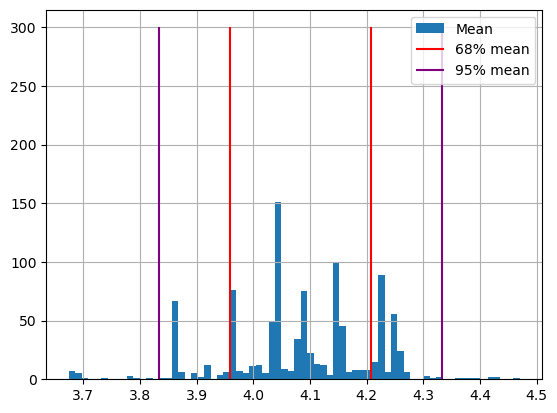

In [141]:
#Marginal Plot
plt.hist(params[0:,0],bins=70,label='Mean');
plt.vlines(x=params[0:,0].mean() - params[0:,0].std(),ymin=0,ymax=300,colors='red',label='68% mean')
plt.vlines(x=params[0:,0].mean() + params[0:,0].std(),ymin=0,ymax=300,colors='red')
plt.vlines(x=params[0:,0].mean() - 2*params[0:,0].std(),ymin=0,ymax=300,colors='purple',label='95% mean')
plt.vlines(x=params[0:,0].mean() + 2*params[0:,0].std(),ymin=0,ymax=300,colors='purple')
plt.legend();
plt.grid()

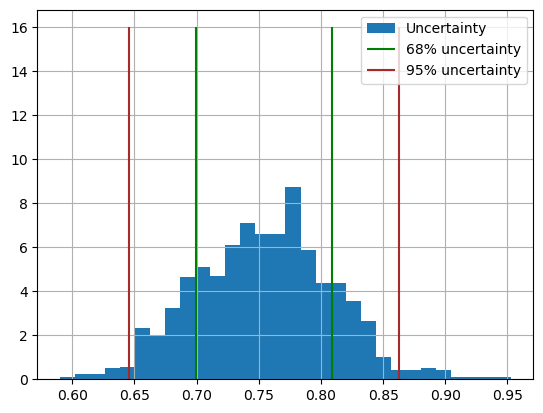

In [142]:
plt.hist(params[0:,1],bins=30,label='Uncertainty',density=True);
plt.vlines(x=params[0:,1].mean() - params[0:,1].std(),ymin=0,ymax=16,colors='green',label='68% uncertainty')
plt.vlines(x=params[0:,1].mean() + params[0:,1].std(),ymin=0,ymax=16,colors='green')
plt.vlines(x=params[0:,1].mean() - 2*params[0:,1].std(),ymin=0,ymax=16,colors='brown',label='95% uncertainty')
plt.vlines(x=params[0:,1].mean() + 2*params[0:,1].std(),ymin=0,ymax=16,colors='brown')
plt.legend();
plt.grid()

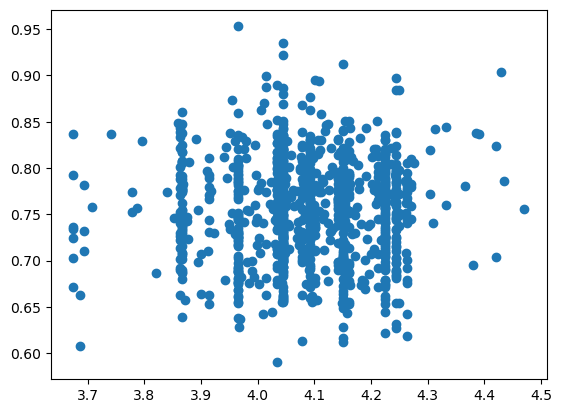

In [143]:
plt.scatter(params[0:,0],params[0:,1])

Text(0, 0.5, 'STD')

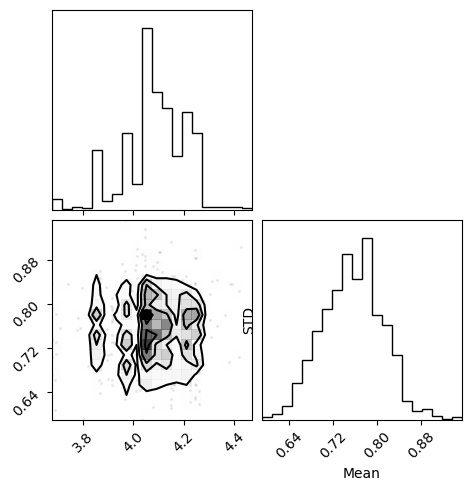

In [144]:
import corner
corner.corner(params)
plt.xlabel('Mean')
plt.ylabel('STD')

9) Let's finish with a Fisher uncertainty estimate of the Laplacian parameters. Use the following code to install numdifftools which provides a simple way to compute derivatives. We can then compute the Hessian matrix, which is the matrix of the second derivatives of the user's function. This should be computed at the best-fit Laplacian parameters 
 and 
. To finish, invert the matrix, and then take the square root. The diagonal entries will then be the Fisher uncertainties on 
 and 
. How does these compare to the bootstrap distribution widths found in (8)?

In [163]:
import numdifftools as nd

def f_lnlaplace(loc,scale):
    func = stats.laplace.pdf(data,loc,scale) #Laplace distribution
    return 0.5 * np.sum(((data - func) / noise)**2) #ln(L)

meaan = params[0:,0].mean()
sttd = params[0:,1].mean()
H = nd.Hessian(f_lnlaplace)(meaan,sttd)
sigma_laplace = np.linalg.inv(H)**0.5
sigma_laplace[0][0]

0.09897751948395957

In [160]:
params[0:,1].mean()


0.7541310882863084

The  values have a difference of 0.6, this is a huge difference